In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv( "Position_Salaries.csv" )
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


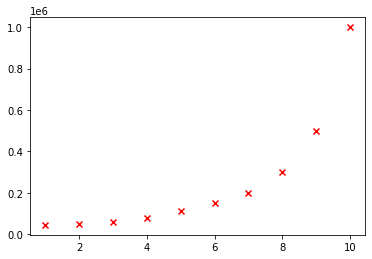

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter( df["Level"], df["Salary"], color = "red", marker = 'x' )
plt.show( )

In [4]:
# There is a non-linear correlation between data points.

In [5]:
X = df.iloc[:, 1].values.reshape( -1, 1 )
y = df.iloc[:, -1].values.reshape( -1, 1 )
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler( )
X = scaler_x.fit_transform( X )
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
scaler_y = StandardScaler( )
y = scaler_y.fit_transform( y )
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [9]:
y = y.reshape( -1 )
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [10]:
from sklearn import svm

model = svm.SVR( )
model.fit( X, y )

SVR()

In [11]:
y_pred = model.predict( X )
y_pred

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [12]:
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [13]:
results = pd.DataFrame( { "True value" : scaler_y.inverse_transform( y ),
                          "Predicted value" : scaler_y.inverse_transform( y_pred ) } )
results

,True value,Predicted value
0,45000.0,73474.156157
1,50000.0,70786.945846
2,60000.0,88213.009021
3,80000.0,108254.985750
4,110000.0,122574.522506
5,150000.0,145503.106886
6,200000.0,209410.231329
7,300000.0,330606.892046
8,500000.0,471671.955873
9,1000000.0,557821.758999


In [14]:
scaler_y.inverse_transform( model.predict( scaler_x.transform( [[6.5]] ) ) )

array([170370.0204065])

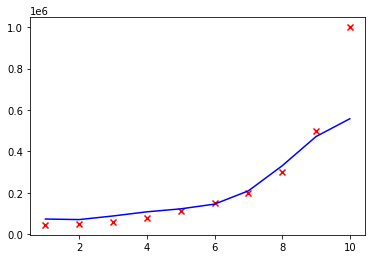

In [15]:
plt.scatter( scaler_x.inverse_transform( X ), scaler_y.inverse_transform( y ), color = "red", marker = 'x' )
plt.plot( scaler_x.inverse_transform( X ), scaler_y.inverse_transform( model.predict( X ) ), color = "blue" )
plt.show( )

In [16]:
model.score( X, y )

0.7516001070620798